In [60]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
from matplotlib.image import imread
from sklearn.metrics import classification_report
#tensorflow modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
img_dir = "dataset/"
img_dir

'dataset/'

In [62]:
train_path = "dataset\\ALL_IDB1\\ALL_IDB1\\im"
len(os.listdir(train_path))

108

In [63]:
sample_image = os.listdir(train_path)[0]
sample_image

'Im001_1.jpg'

In [64]:
sample_image_id = os.listdir(train_path)[0][6]
sample_image_id

'1'

In [65]:
img_dir =train_path 
img_files = os.listdir(img_dir)
labels = [int(img_file.split('_')[-1].split('.')[0]) for img_file in img_files]
df = pd.DataFrame({
    'filename': img_files,
    'label': labels
})


In [66]:
data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25,
    shear_range=0.2,
    zoom_range=0.3,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode="reflect",
)


In [67]:
train_generator = data_generator.flow_from_dataframe(
    df,
    directory=img_dir,
    x_col="filename",
    y_col="label",
    target_size =(224,224),
    shuffle=True,
    class_mode="raw",
    batch_size=32,
    color_mode="rgb",
    subset="training",
    seed=42,
)

Found 81 validated image filenames.


In [68]:
val_generator = data_generator.flow_from_dataframe(
    df,
    directory=img_dir,
    x_col="filename",
    y_col="label",
    target_size = (224,224),
    shuffle = True,
    class_mode='raw',
    batch_size=32,
    color_mode="rgb",
    subset="validation",
)

Found 27 validated image filenames.


In [69]:
image,label = train_generator.next()
print(image.shape)
print(label.shape)


(32, 224, 224, 3)
(32,)


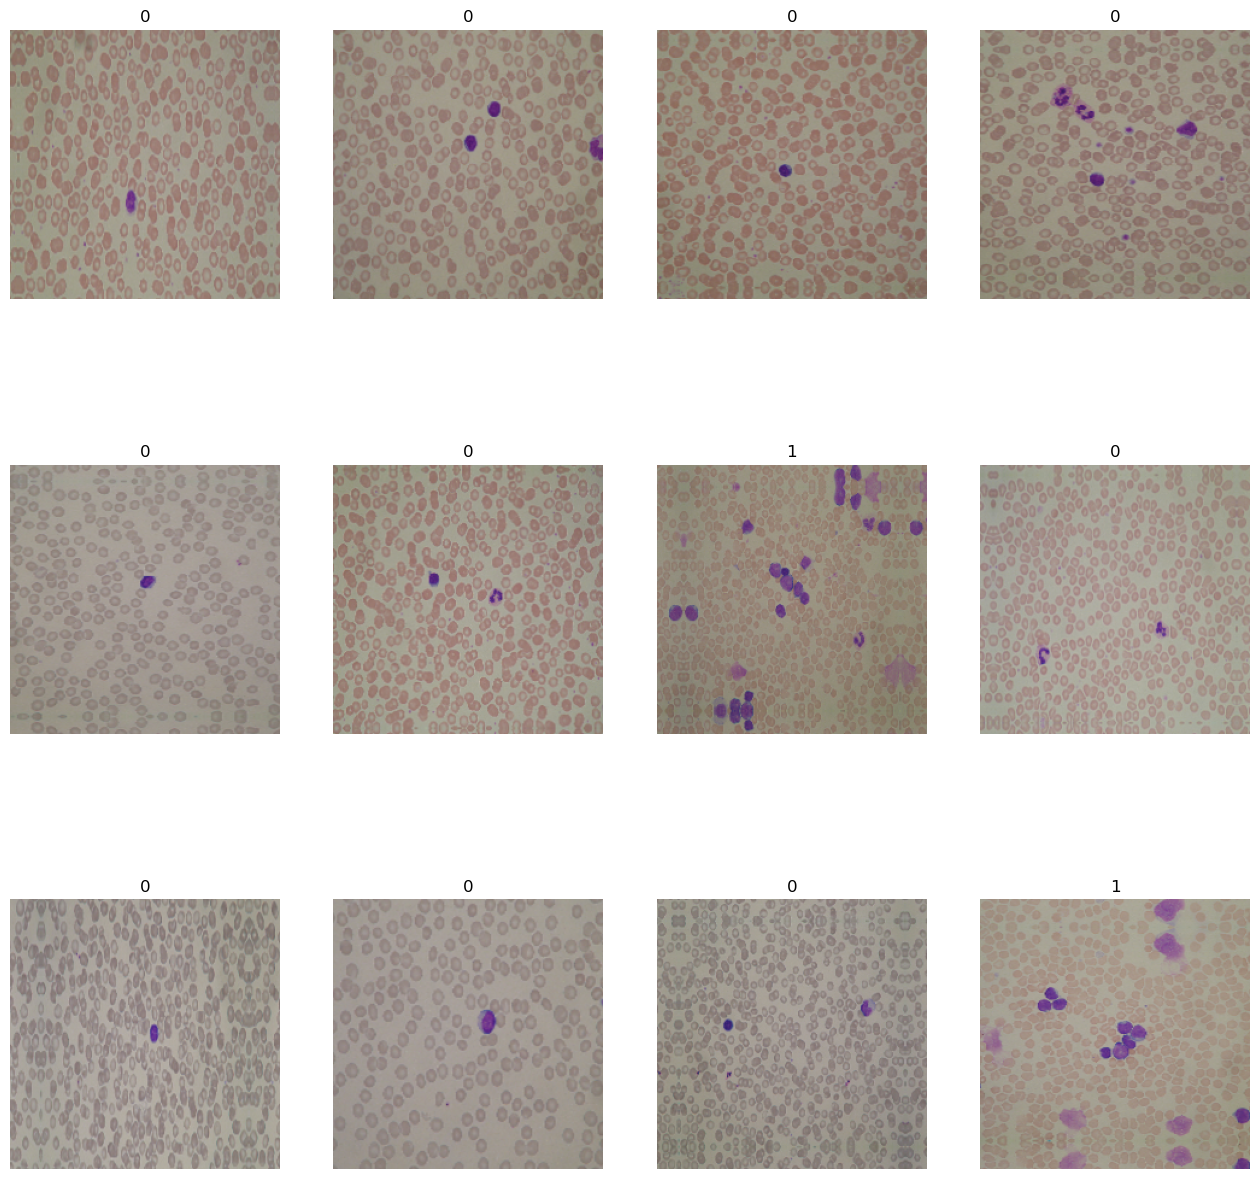

In [70]:
plt.figure(figsize=(16,16))
for i in range(12):
    image,label = train_generator.next()
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(label[i])
    plt.axis("off")

In [71]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization, Dropout
from keras import regularizers
input_shape = (224,224,3)
n_classes = 1
model = Sequential([
Conv2D(128, kernel_size = (3,3), activation='relu', input_shape=input_shape ,
padding='same',kernel_regularizer=regularizers.l2(0.01)),
BatchNormalization(axis=-1),
MaxPooling2D((3,3)),
Conv2D(256, kernel_size = (3,3), activation='relu',
padding='same',kernel_regularizer=regularizers.l2(0.01)),
BatchNormalization(axis=-1),
Conv2D(512, kernel_size = (3,3), activation='relu', input_shape=input_shape ,
padding='same',kernel_regularizer=regularizers.l2(0.01)),
BatchNormalization(axis=-1),
MaxPooling2D((3,3)),
Conv2D(1024, kernel_size = (3,3), activation='relu', input_shape=input_shape ,
padding='same',kernel_regularizer=regularizers.l2(0.01)),
BatchNormalization(axis=-1),
Conv2D(1024, kernel_size = (3,3), activation='relu', input_shape=input_shape ,
padding='same',kernel_regularizer=regularizers.l2(0.01)),
BatchNormalization(axis=-1),
MaxPooling2D((3,3)),
Conv2D(1024, kernel_size = (3,3), activation='relu',
padding='same',kernel_regularizer=regularizers.l2(0.01)),
BatchNormalization(axis=-1),
Conv2D(1024, kernel_size = (3,3), activation='relu', input_shape=input_shape ,
padding='same',kernel_regularizer=regularizers.l2(0.01)),
BatchNormalization(axis=-1),
MaxPooling2D((3,3)),
Flatten(),
Dense(1024, activation='relu'),
BatchNormalization(axis=-1),
# Dropout(0.3),
Dense(n_classes, activation='sigmoid'),
])
model.build(input_shape=input_shape)

In [72]:
optimizer = Adam( learning_rate=0.00001)
model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [73]:
# Set up callbacks for early stopping and model checkpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('model.h5', save_best_only=True, save_weights_only=False)



In [74]:
history = model.fit(train_generator,
          epochs = 10,
       
          #steps_per_epoch = 25,
          steps_per_epoch=train_generator.n//32,
#           batch_size =32,
          validation_data = val_generator,
                    #Wrong
          validation_steps = 1,
        #   validation_steps=1,
          callbacks=[early_stop, model_checkpoint],)

Epoch 1/10
2/2 [==============================] - ETA: 0s - loss: 43.6787 - accuracy: 0.5469 

OSError: [Errno 22] Unable to create file (unable to open file: name = 'model.h5', errno = 22, error message = 'Invalid argument', flags = 13, o_flags = 302)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 128)     3584      
                                                                 
 batch_normalization_16 (Bat  (None, 224, 224, 128)    512       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 74, 74, 256)       295168    
                                                                 
 batch_normalization_17 (Bat  (None, 74, 74, 256)      1024      
 chNormalization)                                                
                                                      

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame

,loss,accuracy,val_loss,val_accuracy
0,43.399395,0.673469,43.412628,0.037037
1,43.245636,0.775510,43.429214,0.000000
2,42.955841,0.921875,43.455193,0.000000
3,43.005379,0.890625,43.489254,0.000000
4,42.935574,0.921875,43.526646,0.000000
5,42.937447,0.890625,43.566925,0.000000
6,42.897770,0.959184,43.619106,0.000000
7,42.781521,1.000000,43.671127,0.000000
8,42.822815,0.959184,43.724628,0.000000
9,42.847759,0.959184,43.790756,0.000000


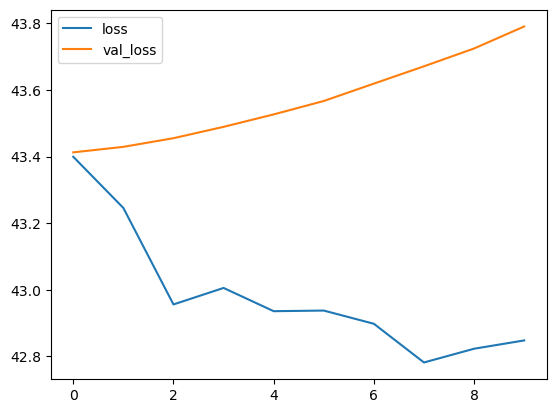

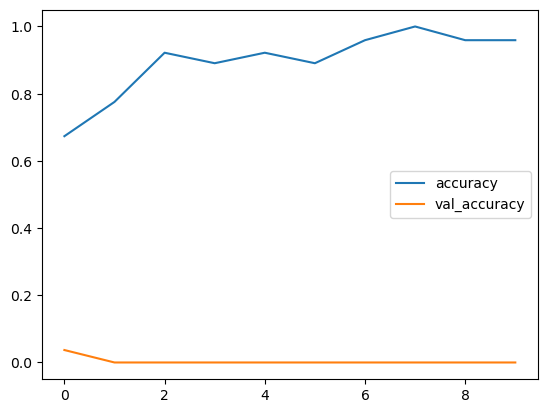

In [ ]:
history_frame.loc[:,["loss", "val_loss"]].plot()
history_frame.loc[:,["accuracy", "val_accuracy"]].plot();